In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data

In [2]:
'''from sklearn.datasets import fetch_openml
X_cvs,y_cvs = fetch_openml('mnist_784', version=1, return_X_y=True)
#save data to csv file
X_cvs.to_csv('features_set.csv', index=False)
y_cvs.to_csv('classes_set.csv', index=False)'''

"from sklearn.datasets import fetch_openml\nX_cvs,y_cvs = fetch_openml('mnist_784', version=1, return_X_y=True)\n#save data to csv file\nX_cvs.to_csv('features_set.csv', index=False)\ny_cvs.to_csv('classes_set.csv', index=False)"

In [1]:
import pandas as pd
#read data from csv file
X = pd.read_csv('features_set.csv')
y = pd.read_csv('classes_set.csv')

In [2]:
y = y.astype(int)
X = X/255.

In [3]:
from sklearn.utils import shuffle
X,y = shuffle(X, y, random_state=0)


In [4]:
n_samples = 17000
X = X.head(n_samples)
y = y.head(n_samples)
y

,class
10840,0
56267,4
14849,1
62726,2
47180,7
...,...
12506,3
3429,0
3008,7
48324,3


# 

# PCA ANALYSIS

In [7]:
# 1. Reduce Image Dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_reduced = pca.fit_transform(X)
print(f'df shape : {X_reduced.shape}')

df shape : (17000, 1)


In [8]:
X_reduced[1] #the number 4 represented as:

array([0.16322283])

Projecting 784-dimensional data to 1D


C:\Users\victo\AppData\Local\Temp\ipykernel_16536\3812934147.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


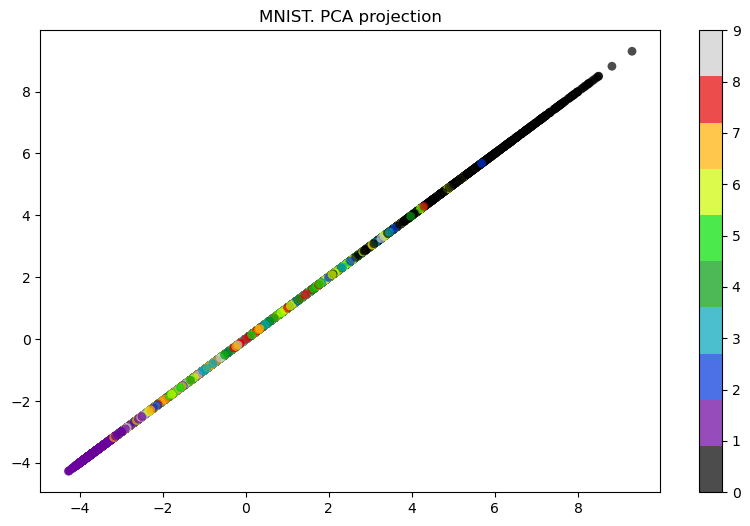

In [9]:
# 2. Visualize the Resulting Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

print('Projecting %d-dimensional data to 1D' % X.shape[1])

plt.figure(figsize=(10,6))
plt.scatter(X_reduced, X_reduced, c=y.to_numpy(), 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');


# 

In [15]:
# 1. Reduce Image Dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
print(f'df shape : {X_reduced.shape}')

df shape : (17000, 2)


In [11]:
X_reduced[1] #the number 4 represented as:

array([ 0.1632189 , -2.81952827])

Projecting 784-dimensional data to 2D


C:\Users\victo\AppData\Local\Temp\ipykernel_16536\1142563677.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


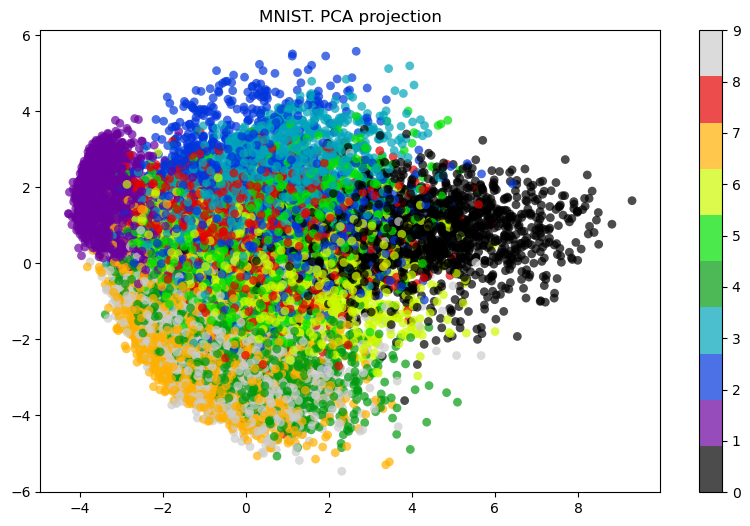

In [12]:
# 2. Visualize the Resulting Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(10,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y.to_numpy(), 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

# 

In [5]:
#number of components that will be used
n_components_range = [2, 5, 15, 50, 100, 200]

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits


# Perform PCA to reduce the dimensionality of the images
pca2 = PCA(n_components=2)
X_reduced2 = pca2.fit_transform(X)

pca5 = PCA(n_components=5)
X_reduced5 = pca5.fit_transform(X)

pca15 = PCA(n_components=15)
X_reduced15 = pca15.fit_transform(X)

pca50 = PCA(n_components=50)
X_reduced50 = pca50.fit_transform(X)

pca100 = PCA(n_components=100)
X_reduced100 = pca100.fit_transform(X)

pca200 = PCA(n_components=200)
X_reduced200 = pca200.fit_transform(X)



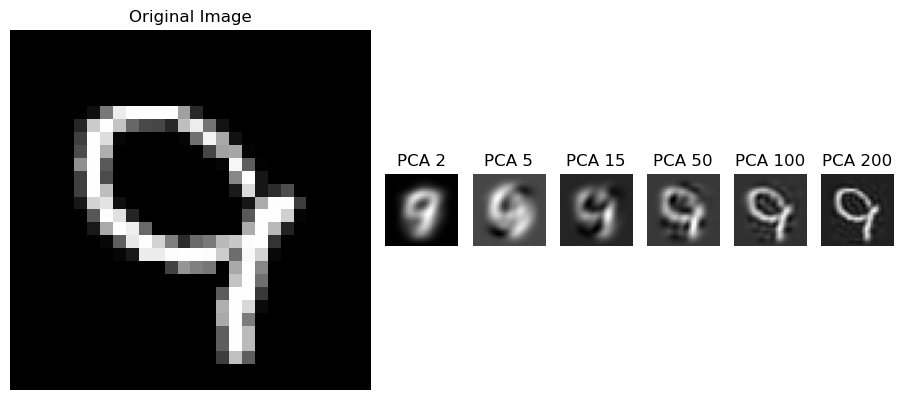

In [15]:
# Choose an image from the reduced dataset
image_index = 5  # Change this index to see different images
from matplotlib import gridspec

original_image = X.to_numpy()[image_index].reshape(28, 28)
pca_images = []
pca_images.append(pca2.inverse_transform(X_reduced2[image_index]).reshape(28, 28))
pca_images.append (pca5.inverse_transform(X_reduced5[image_index]).reshape(28, 28))
pca_images.append (pca15.inverse_transform(X_reduced15[image_index]).reshape(28, 28))
pca_images.append (pca50.inverse_transform(X_reduced50[image_index]).reshape(28, 28))
pca_images.append( pca100.inverse_transform(X_reduced100[image_index]).reshape(28, 28))
pca_images.append (pca200.inverse_transform(X_reduced200[image_index]).reshape(28, 28))


# Create a 1x8 grid with a ratio of 5:1 for the large image and small images
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(1, 8, width_ratios=[5] + [1] * 7)

# Plot the original image
ax0 = plt.subplot(gs[0])
ax0.imshow(original_image, cmap='gray')  # Adjust the cmap as needed
ax0.set_title('Original Image')
ax0.axis('off')  # Turn off axis for the large image

# Plot the small images
for i, image in enumerate(pca_images):
    ax = plt.subplot(gs[i+1])
    ax.imshow(image, cmap='gray')  # Adjust the cmap as needed
    ax.set_title(f'PCA {n_components_range[i]}')
    ax.axis('off')  # Turn off axis for the small images

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()

 # 
 

# Mean Shift Clustering

In [17]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt


ms = MeanShift(bandwidth=0.7, bin_seeding=True)
y_pred = ms.fit_predict(X_reduced)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 9


Text(0.5, 1.0, 'Mean Shift')

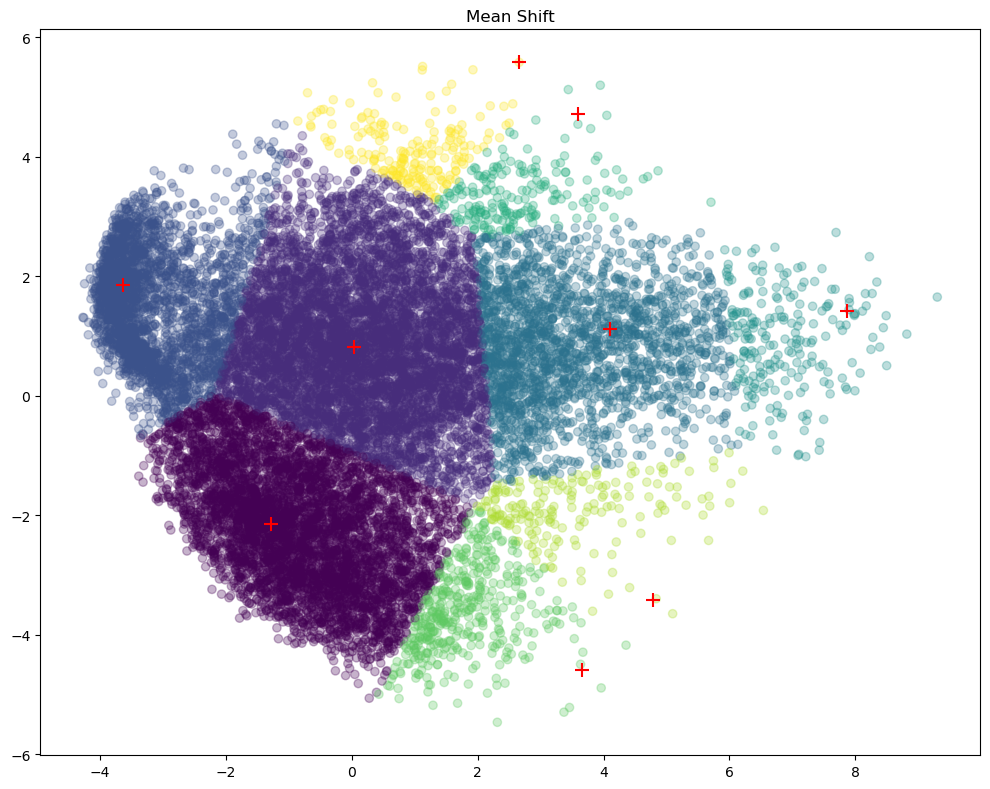

In [18]:
fig, ax = plt.subplots(figsize=(10,8), tight_layout=True)
ax.scatter(X_reduced[:,0], X_reduced[:,1], c=labels, alpha=0.3)
c = cluster_centers
ax.scatter(c[:,0], c[:,1], c='red', marker='+', s=100)
ax.set_title("Mean Shift")

In [19]:
#accuracy
from sklearn.metrics.cluster import rand_score
rand_score(y.values.flatten(), y_pred)

0.7682326918884502

<h3> test:

In [20]:
import time
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np
import math
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import rand_score

bandwidths = np.array([[0.6, 0.7, 0.8, 0.9, 1],
                      [2.1, 2.3, 2.5, 2.7, 2.9],
                      [3.5, 3.7, 3.9, 4.1, 4.2],
                      [4.0, 4.3, 4.5, 4.7, 4.9],
                      [4.5, 4.7, 4.9, 5.1, 5.3],
                      [4.7, 5.0, 5.3, 5.5, 5.7]])
                
rand_scores_ =  np.zeros((len(n_components_range), 5))
execution_time_ = np.zeros((len(n_components_range), 5))


#loop over PCA dimensionality
for i, n_components in enumerate(n_components_range):
    # PCA dimensional reduction      
    pca = PCA(n_components=n_components)  
    X_pca =pca.fit_transform(X)
    
    print('PCA n_components: {} '.format(n_components))    

    
    for j in range(0, 5):
        
        # Mean Shift
        bandwidth=bandwidths[i, j]
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        st = time.time() #start time
        y_pred = ms.fit_predict(X_pca)
        et = time.time() #end time
        
        #save rand_score and execution_time
        rand_scores_[i][j] = rand_score(y.values.flatten(), y_pred)
        execution_time_[i][j] = et - st
        
        labels = ms.labels_
        cluster_centers = ms.cluster_centers_

        labels_unique = np.unique(labels)
        n_clusters_ = len(labels_unique)
        
        print('bandwidth: {}, rand_score: {}, execution_time: {} seconds, n_clusters: {} '.format(bandwidth, rand_scores_[i][j], execution_time_[i][j], n_clusters_))
    
'''pd.DataFrame(rand_scores_).to_csv('rand_scores_ms.csv', index=False)
pd.DataFrame(execution_time_).to_csv('execution_time_ms.csv', index=False)'''

PCA n_components: 2 
bandwidth: 0.6, rand_score: 0.8554933127554216, execution_time: 24.74240016937256 seconds, n_clusters: 23 
bandwidth: 0.7, rand_score: 0.7682326918884502, execution_time: 19.772942543029785 seconds, n_clusters: 9 
bandwidth: 0.8, rand_score: 0.75545710301298, execution_time: 16.017140865325928 seconds, n_clusters: 6 
bandwidth: 0.9, rand_score: 0.7224377835374399, execution_time: 12.189199209213257 seconds, n_clusters: 4 
bandwidth: 1.0, rand_score: 0.6597852261205677, execution_time: 8.571869850158691 seconds, n_clusters: 3 
PCA n_components: 5 
bandwidth: 2.1, rand_score: 0.8200874099860546, execution_time: 58.461729526519775 seconds, n_clusters: 10 
bandwidth: 2.3, rand_score: 0.7880763159078562, execution_time: 50.648736000061035 seconds, n_clusters: 9 
bandwidth: 2.5, rand_score: 0.7597669482287885, execution_time: 38.09484076499939 seconds, n_clusters: 5 
bandwidth: 2.7, rand_score: 0.6546851752525235, execution_time: 30.588884353637695 seconds, n_clusters: 4

"pd.DataFrame(rand_scores_).to_csv('rand_scores_ms.csv', index=False)\npd.DataFrame(execution_time_).to_csv('execution_time_ms.csv', index=False)"

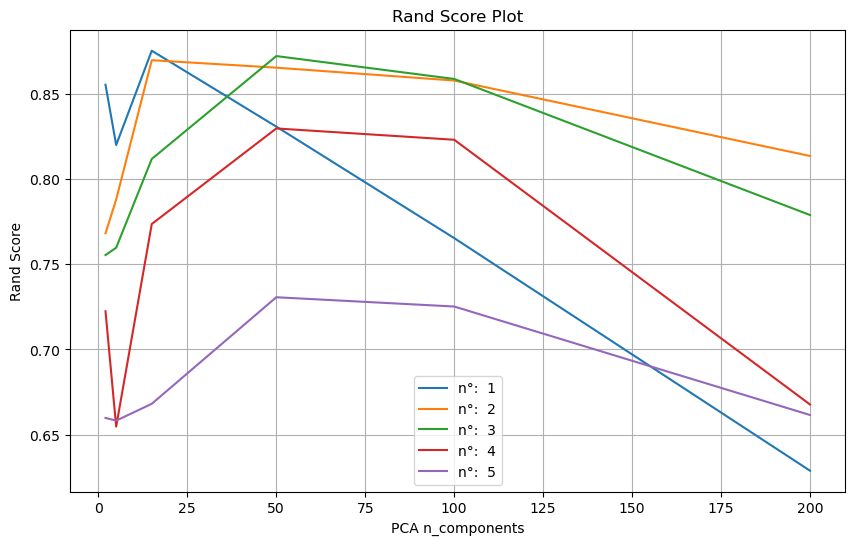

In [21]:
import matplotlib.pyplot as plt
# plot the rand scores
fig, ax = plt.subplots(figsize = (10, 6))
for j in range(0,5):
    ax.plot(n_components_range, rand_scores_[:, j], label = 'n°:  {}'.format(j+1))
ax.set_xlabel('PCA n_components')
ax.set_ylabel('Rand Score')
ax.set_title('Rand Score Plot')
ax.legend()
plt.grid()
plt.show()

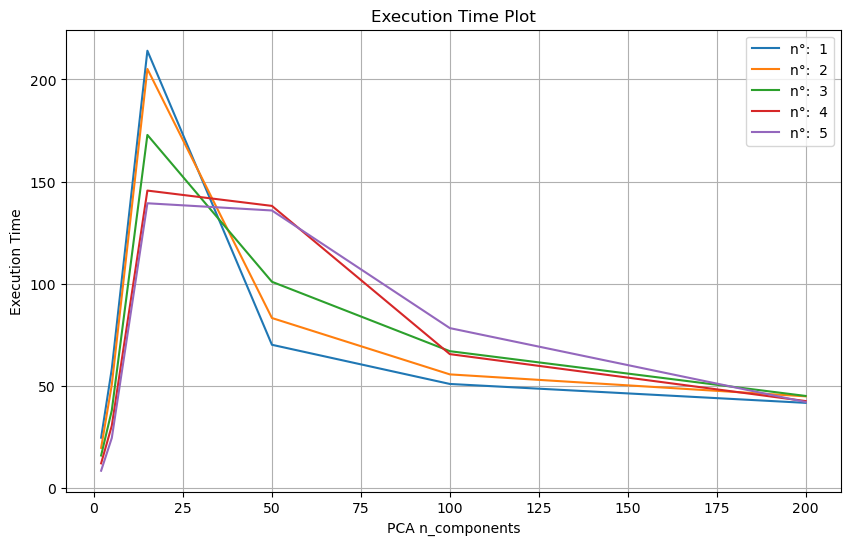

In [22]:
import matplotlib.pyplot as plt
# plot the execution time
fig, ax = plt.subplots(figsize = (10, 6))
for j in range(0,5):
    ax.plot(n_components_range, execution_time_[:, j], label = 'n°:  {}'.format(j+1))
ax.set_xlabel('PCA n_components')
ax.set_ylabel('Execution Time')
ax.set_title('Execution Time Plot')
ax.legend()
plt.grid()
plt.show()

In [23]:
best_rand_score = np.max(rand_scores_)
best_n_components = n_components_range[np.argmax(rand_scores_) // 5]
best_k = bandwidths[np.argmax(rand_scores_) // 5, np.argmax(rand_scores_) % 5]
print('best PCA n_components: {}, with best bandwidth: {} and rand score {}'.format(best_n_components, best_k, best_rand_score))

best PCA n_components: 15, with best bandwidth: 3.5 and rand score 0.8754623420754855


# 

# # Normalized Clustering

In [24]:
from sklearn.cluster import SpectralClustering
import numpy as np
from sklearn.decomposition import PCA

nc = SpectralClustering(n_clusters=10,
        assign_labels='discretize',
        random_state=0, gamma = 0.1)

y_pred = nc.fit_predict(X_reduced)

labels_unique = np.unique(y_pred)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 10


Text(0.5, 1.0, 'Normalized Cut Clustering')

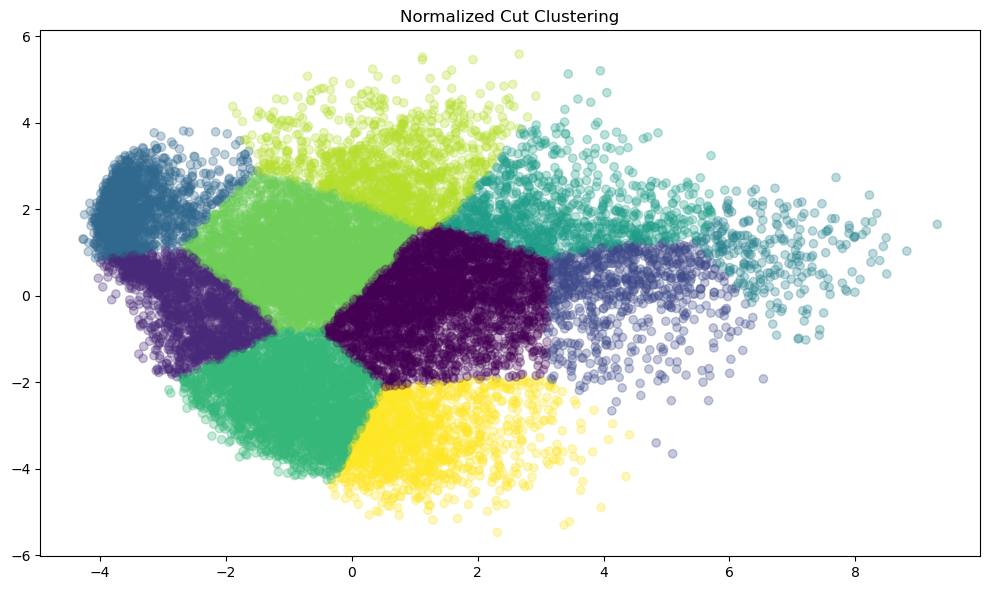

In [25]:
fig, ax = plt.subplots(figsize=(10,6), tight_layout=True)
ax.scatter(X_reduced[:,0], X_reduced[:,1], c=y_pred, alpha=0.3)
ax.set_title("Normalized Cut Clustering")

In [26]:
#accuracy
from sklearn.metrics.cluster import rand_score
rand_score(y.values.flatten(), y_pred)

0.8343404629338058

<h3> test:

In [6]:
import time
from sklearn.cluster import SpectralClustering
import numpy as np
from sklearn.metrics.cluster import rand_score
from sklearn.decomposition import PCA
from sklearn.cluster import spectral_clustering
from sklearn.metrics.pairwise import rbf_kernel

n_clusters = list (range(2,16))
rand_scores_  = np.zeros((len(n_components_range), len(n_clusters)))
execution_time_  = np.zeros((len(n_components_range), len(n_clusters)))


#loop over PCA dimensionality
for i, n_components in enumerate(n_components_range):
    # PCA dimensional reduction  
    
    pca = PCA(n_components=n_components)  
    X_pca =pca.fit_transform(X)
    
    #precompute the affinity matrix
    affinity_matrix = rbf_kernel(X_pca, gamma=0.1)
    print('PCA n_components: {} '.format(n_components))    
    
    for j, k in enumerate(n_clusters):
        # Spectral Clustering
        nc = SpectralClustering(affinity = 'precomputed', n_clusters=k)
        st = time.time() #start time
        y_pred = nc.fit_predict(affinity_matrix)
        et = time.time() #end time
        
        #save rand_score and execution_time
        rand_scores_[i][j] = rand_score(y.values.flatten(), y_pred)
        execution_time_[i][j] = et - st
        
        print('k: {}, rand_score: {}, execution_time: {} seconds'.format(k, rand_scores_[i][j], execution_time_[i][j]))

'''pd.DataFrame(rand_scores_).to_csv('rand_scores_nc.csv', index=False)
pd.DataFrame(execution_time_).to_csv('execution_time_nc.csv', index=False)'''

PCA n_components: 2 
k: 2, rand_score: 0.3627491167300499, execution_time: 174.38992500305176 seconds
k: 3, rand_score: 0.6584587951540402, execution_time: 123.53108668327332 seconds
k: 4, rand_score: 0.7063267597055882, execution_time: 117.52764201164246 seconds
k: 5, rand_score: 0.7207020412965468, execution_time: 120.82099175453186 seconds
k: 6, rand_score: 0.6617947768553859, execution_time: 121.23020434379578 seconds
k: 7, rand_score: 0.6890426980133779, execution_time: 120.82074880599976 seconds
k: 8, rand_score: 0.6808305540464318, execution_time: 121.52492260932922 seconds
k: 9, rand_score: 0.7200723987224162, execution_time: 110.7084698677063 seconds
k: 10, rand_score: 0.7794545007837831, execution_time: 107.99021220207214 seconds
k: 11, rand_score: 0.798848084489399, execution_time: 107.33227777481079 seconds
k: 12, rand_score: 0.7982675243872477, execution_time: 112.13564443588257 seconds
k: 13, rand_score: 0.7608075838371116, execution_time: 126.73939800262451 seconds
k: 14

"pd.DataFrame(rand_scores_).to_csv('rand_scores_nc.csv', index=False)\npd.DataFrame(execution_time_).to_csv('execution_time_nc.csv', index=False)"

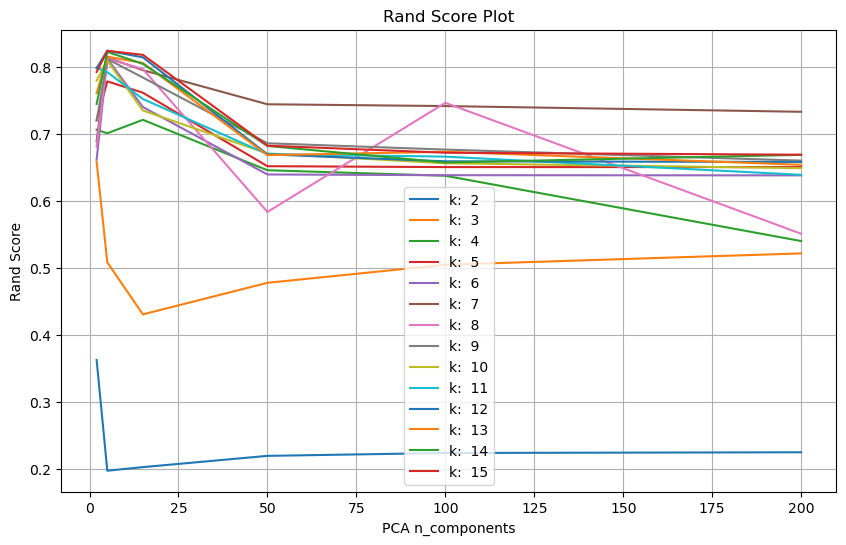

In [7]:
import matplotlib.pyplot as plt
# plot the rand scores
fig, ax = plt.subplots(figsize = (10, 6))
for j, k in enumerate(n_clusters):
    ax.plot(n_components_range, rand_scores_[:, j], label = 'k:  {}'.format(k))
ax.set_xlabel('PCA n_components')
ax.set_ylabel('Rand Score')
ax.set_title('Rand Score Plot')
ax.legend()
plt.grid()
plt.show()

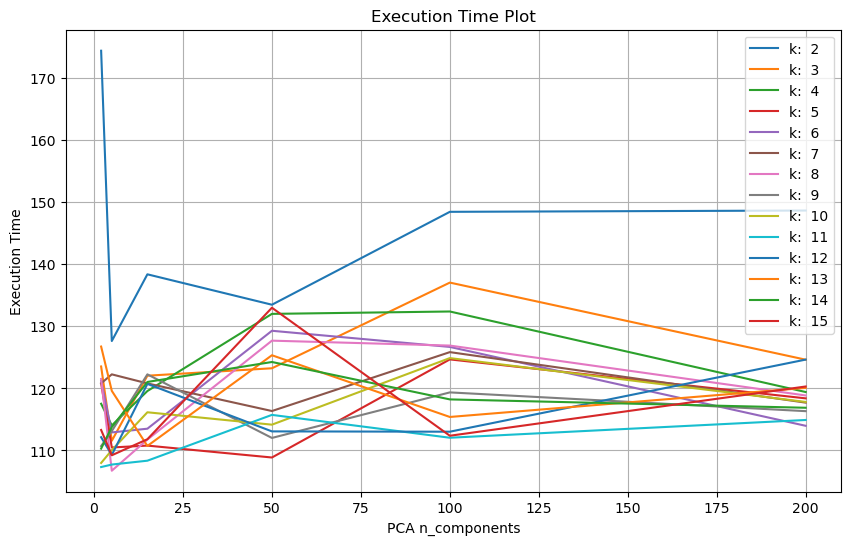

In [8]:
# plot the execution time
fig, ax = plt.subplots(figsize = (10, 6))
for j, k in enumerate(n_clusters):
    ax.plot(n_components_range, execution_time_[:, j], label = 'k:  {}'.format(k))
ax.set_xlabel('PCA n_components')
ax.set_ylabel('Execution Time')
ax.set_title('Execution Time Plot')
ax.legend()
plt.grid()
plt.show()

In [9]:
best_rand_score = np.max(rand_scores_)
best_n_components = n_components_range[np.argmax(rand_scores_) // len(n_clusters)]
best_k = n_clusters[np.argmax(rand_scores_) % len(n_clusters)]
print('best PCA n_components: {}, with best k: {} and rand score {}'.format(best_n_components, best_k, best_rand_score))

best PCA n_components: 5, with best k: 12 and rand score 0.82431329178533


# 

# mixture of Gaussians with diagonal covariance

In [16]:
import numpy as np
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=10, covariance_type = 'diag', random_state=0)
gm.fit(X_reduced)
means = gm.means_

y_pred = gm.fit_predict(X_reduced)
labels_unique = np.unique(y_pred)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 10


Text(0.5, 1.0, 'mixture of Gaussians with diagonal covariance')

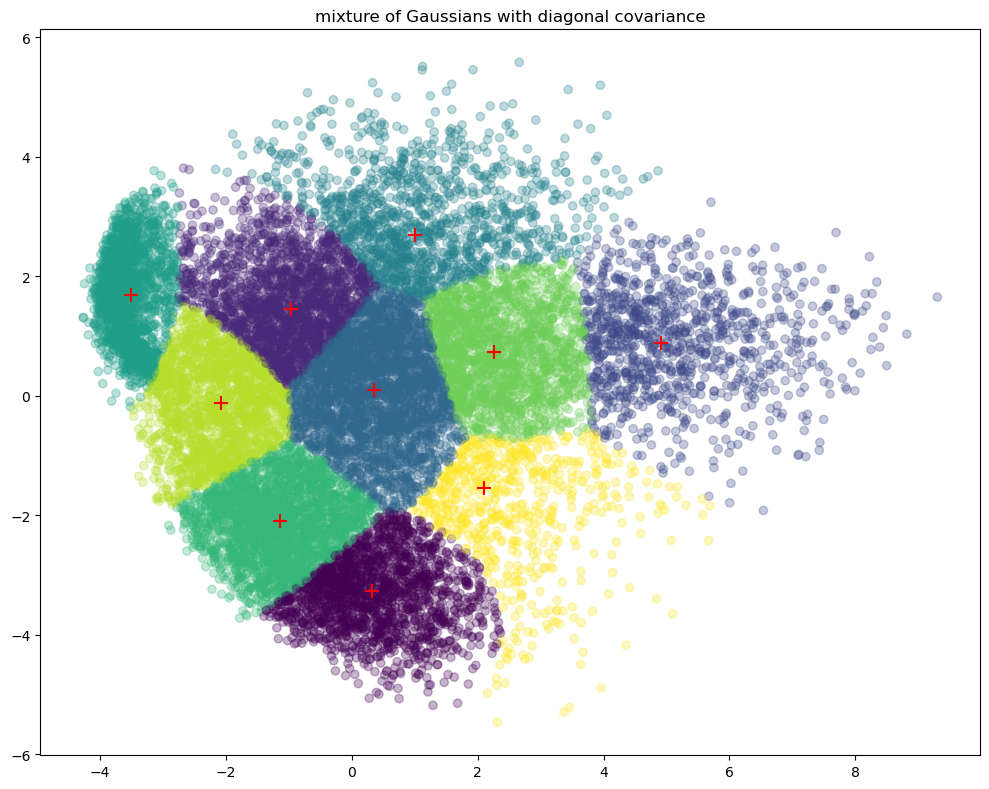

In [19]:
fig, ax = plt.subplots(figsize=(10,8), tight_layout=True)
ax.scatter(X_reduced[:,0], X_reduced[:,1], c=y_pred, alpha=0.3)
c = means
ax.scatter(c[:,0], c[:,1], c='red', marker='+', s=100)
ax.set_title("mixture of Gaussians with diagonal covariance")

In [18]:
#accuracy
from sklearn.metrics.cluster import rand_score
rand_score(y.values.flatten(), y_pred)

0.853624815300554

<h3> tests:

In [11]:
import time
from sklearn.mixture import GaussianMixture
import numpy as np

n_clusters = list (range(2,16))
rand_scores_  = np.zeros((len(n_components_range), len(n_clusters)))
execution_time_  = np.zeros((len(n_components_range), len(n_clusters)))


#loop over PCA dimensionality
for i, n_components in enumerate(n_components_range):
    # PCA dimensional reduction  
    
    pca = PCA(n_components=n_components)  
    X_pca =pca.fit_transform(X)
    
    print('PCA n_components: {} '.format(n_components))    
    
    for j, k in enumerate(n_clusters):
        # Gaussian Mixture
        gm = GaussianMixture(n_components=k, covariance_type = 'diag', random_state=0)
        st = time.time() #start time
        y_pred = gm.fit_predict(X_pca)
        et = time.time() #end time
        
        #save rand_score and execution_time
        rand_scores_[i][j] = rand_score(y.values.flatten(), y_pred)
        execution_time_[i][j] = et - st
        
        print('k: {}, rand_score: {}, execution_time: {} seconds'.format(k, rand_scores_[i][j], execution_time_[i][j]))

'''pd.DataFrame(rand_scores_).to_csv('rand_scores_gm.csv', index=False)
pd.DataFrame(execution_time_).to_csv('execution_time_gm.csv', index=False)'''

PCA n_components: 2 
k: 2, rand_score: 0.5086146382313147, execution_time: 0.07724905014038086 seconds
k: 3, rand_score: 0.6948670959883453, execution_time: 0.09574151039123535 seconds
k: 4, rand_score: 0.7512270064329044, execution_time: 0.10204434394836426 seconds
k: 5, rand_score: 0.7409358681998595, execution_time: 0.21428847312927246 seconds
k: 6, rand_score: 0.8077787897557988, execution_time: 0.18558454513549805 seconds
k: 7, rand_score: 0.8230926248256818, execution_time: 0.2097928524017334 seconds
k: 8, rand_score: 0.8377381299245976, execution_time: 0.22940444946289062 seconds
k: 9, rand_score: 0.8499435745355263, execution_time: 0.18507099151611328 seconds
k: 10, rand_score: 0.8536211472647179, execution_time: 0.22388720512390137 seconds
k: 11, rand_score: 0.861315710612735, execution_time: 0.1969289779663086 seconds
k: 12, rand_score: 0.865349968683279, execution_time: 0.25179147720336914 seconds
k: 13, rand_score: 0.867377831913988, execution_time: 0.2612619400024414 secon

"pd.DataFrame(rand_scores_).to_csv('rand_scores_gm.csv', index=False)\npd.DataFrame(execution_time_).to_csv('execution_time_gm.csv', index=False)"

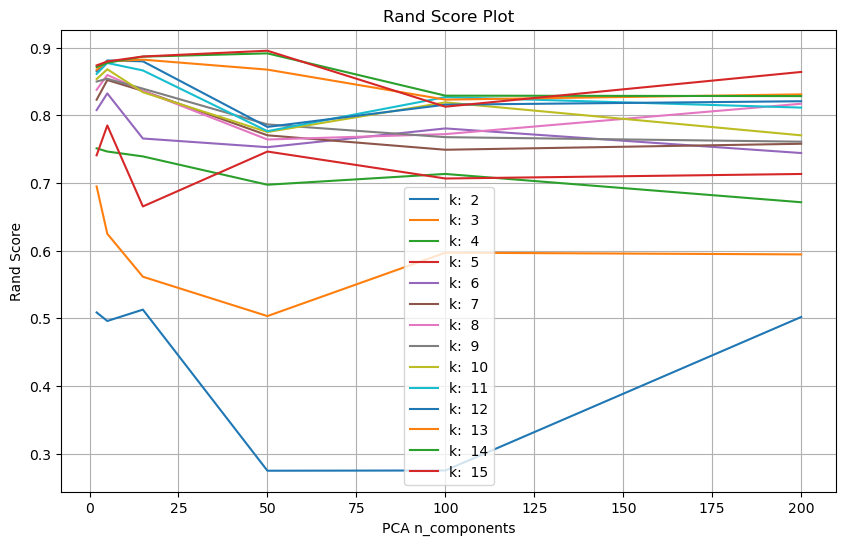

In [12]:
# plot the rand scores
fig, ax = plt.subplots(figsize = (10, 6))
for j, k in enumerate(n_clusters):
    ax.plot(n_components_range, rand_scores_[:, j], label = 'k:  {}'.format(k))
ax.set_xlabel('PCA n_components')
ax.set_ylabel('Rand Score')
ax.set_title('Rand Score Plot')
ax.legend()
plt.grid()
plt.show()

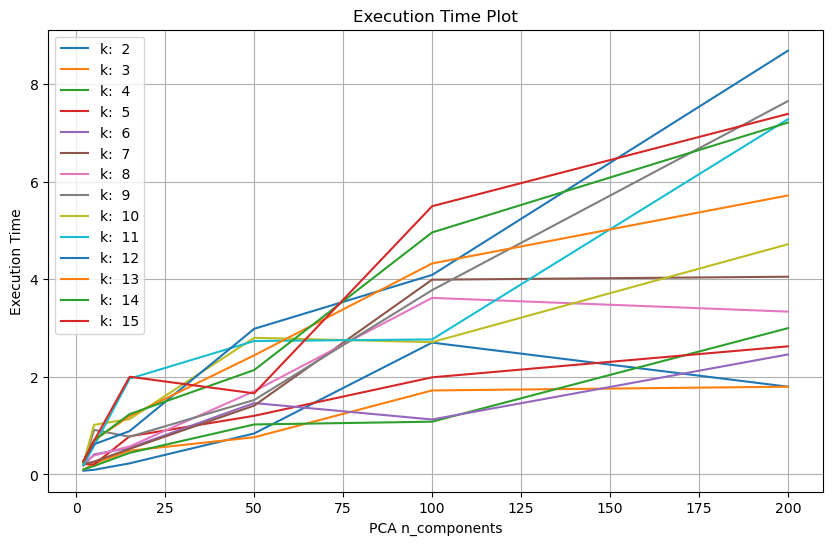

In [13]:
# plot the execution time
fig, ax = plt.subplots(figsize = (10, 6))
for j, k in enumerate(n_clusters):
    ax.plot(n_components_range, execution_time_[:, j], label = 'k:  {}'.format(k))
ax.set_xlabel('PCA n_components')
ax.set_ylabel('Execution Time')
ax.set_title('Execution Time Plot')
ax.legend()
plt.grid()
plt.show()

In [14]:
best_rand_score = np.max(rand_scores_)
best_n_components = n_components_range[np.argmax(rand_score) // len(n_clusters)]
best_k = n_clusters[np.argmax(rand_scores_) % len(n_clusters)]
print('best PCA n_components: {}, with best k: {} and rand score {}'.format(best_n_components, best_k, best_rand_score))

best PCA n_components: 2, with best k: 15 and rand score 0.8955038946927674
